绘制MoESTar消融研究对比

In [12]:
## 第一部分：读取和处理数据
import pandas as pd

path = 'NYCBike1/MoESoft-layers-type'
file_path = f'./{path}/results_show.csv'
fig_title = f'{path}'
data = pd.read_csv(file_path)

# 去除列名中的空格
data.columns = data.columns.str.strip()
# 将分类名提取为列表
variants = data['Category'].tolist()

In [13]:
## 第二部分：计算MAE和MAPE
# 计算加权平均
mae_list = []
rmse_list = []
mape_list = []
for index, row in data.iterrows():
    mae_list.append(row['MAE'])
    rmse_list.append(row['RMSE'])
    mape_list.append(float(row['MAPE'].strip().rstrip('%')))
print(mae_list, rmse_list, mape_list)

[5.11, 5.12, 5.18, 5.18] [7.61, 7.63, 7.77, 7.79] [23.9267, 23.8117, 24.4516, 23.9857]


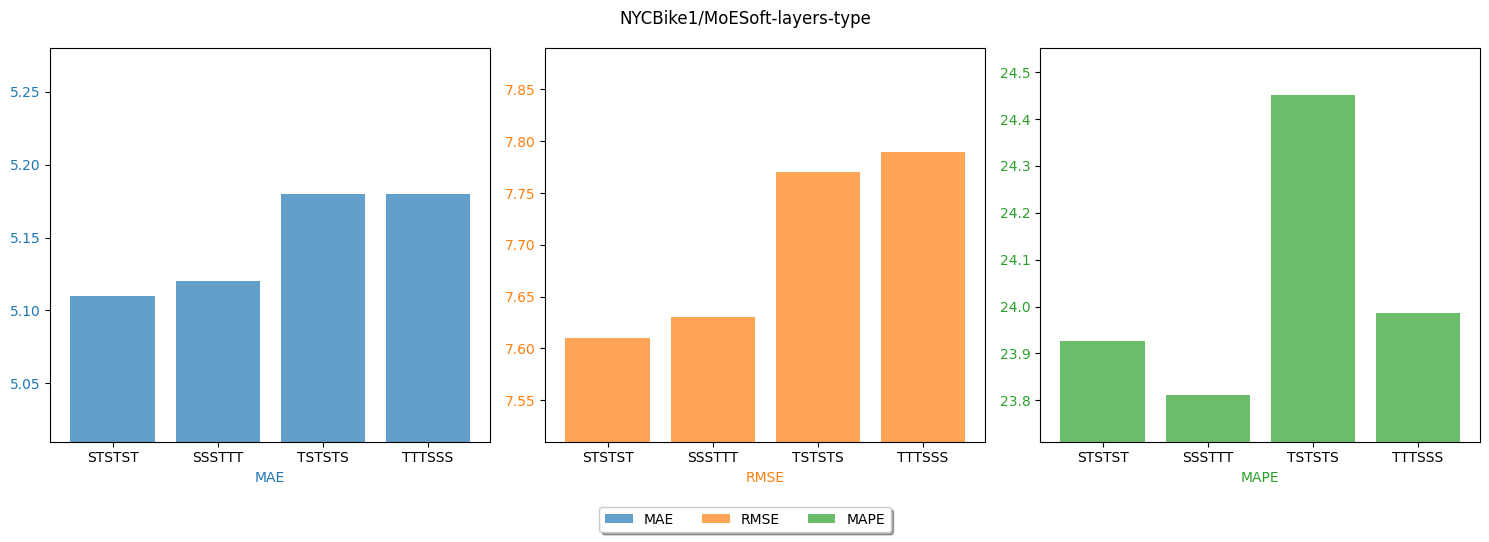

In [14]:
## 第三部分：绘图
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# MAE
color_mae = 'tab:blue'
axs[0].bar(variants, mae_list, color=color_mae, alpha=0.7, label='MAE')
axs[0].set_xlabel('MAE', color=color_mae)
axs[0].tick_params(axis='y', labelcolor=color_mae)
axs[0].set_ylim([min(mae_list) - 0.1, max(mae_list) + 0.1])

# RMSE
color_rmse = 'tab:orange'
axs[1].bar(variants, rmse_list, color=color_rmse, alpha=0.7, label='RMSE')
axs[1].set_xlabel('RMSE', color=color_rmse)
axs[1].tick_params(axis='y', labelcolor=color_rmse)
axs[1].set_ylim([min(rmse_list) - 0.1, max(rmse_list) + 0.1])


# MAPE
color_mape = 'tab:green'
axs[2].bar(variants, mape_list, color=color_mape, alpha=0.7, label='MAPE')
axs[2].set_xlabel('MAPE', color=color_mape)
axs[2].tick_params(axis='y', labelcolor=color_mape)
axs[2].set_ylim([min(mape_list) - 0.1, max(mape_list) + 0.1])


# 添加标题和图例
fig.suptitle(fig_title)
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0.0), shadow=True, ncol=3)
plt.tight_layout()
plt.show()
